## A Real-Estate Regression Problem 

Assume you have secured an internship at the Helsinki office of a real estate investment fund. You have been placed in the research team, and your first task is to develop a ML method for predicting the median house price for different Helsinki neighborhoods. Some of your collegeaus have collected a dataset $\mathcal{D}$ containing information about $20$ different neighborhoods. 

We consider each neighborhood as an invididual datapoint. Each datapoint (neighborhood) is characterized by several features such as the average number of rooms in the apartments, the percentage of buildings constructed before 1970 in the neighborhood, as well as eight experimental features designed by your colleagues in research. The quantity of interest or label for each datapoint is the median house price for a neighborhood. Some real-estate experts have determined the median apartment price for each neighborhood in the database $\mathcal{D}$. The salary for a real-estate expert costs a fortune. Therefore, we want to use ML to learn an predictor function $h(\mathbf{x})$ that is able to accurately predict the median apartment price $y$ solely from the features $\mathbf{x}$ of that neighborhood. 

## The Data

Let us summarize the above ML problem: Datapoints represent neighborhoods that are characterized by $n$ different features that we stack into a feature vector $\mathbf{x}=\big(x_{1},\ldots,x_{n}\big)^{T}$. The features are properties of a neighborhood that can be determined easily in an automated fashion. Each datapoint (neighborhood) has a numeric label $y$ which is the (true) median apartment price of the neighborhood. 

Finding out the label for a datapoint requires real-estate experts who are costly. We have hired some experts to detemrine the median apartment prices for the neighborhoods in a database $\mathcal{D}$. This round studies ML methods that use the labeled datapoints in our database $\mathcal{D}$ to learn a predictor $h(\mathbf{x})$. This predictor function is used to predict the median apartment value of an arbitrary neighborhood (also outside our database $\mathcal{D}$) solely by using the features $\mathbf{x}$ of that neighborhood. 

To learn a predictor $h(\mathbf{x})$ we use our database $\mathcal{D}$ consisting of $m=20$ neighborhoods for which the label values have been determined. In ML terms, our database is a labelled dataset (since we know the label values!) $$\mathcal{D} = \big(\mathbf{x}^{(1)}, y^{(1)}\big), \big(\mathbf{x}^{(2)}, y^{(2)}\big), \ldots, \big(\mathbf{x}^{(m)}, y^{(m)}\big).$$ 
Here, $\mathbf{x}^{(i)} = \big(x_1^{(i)}, x_2^{(i)}, \ldots, x_n^{(i)} \big)^T$ and $y^{(i)}$ denote the feature vector and label, respectively, of the $i$-th data point (neighborhood). It will be convenient to collect the feature vectors of our database $\mathcal{D}$ in the rows of the **feature matrix** $\mathbf{X}$,


\begin{equation}
  \mathbf{X} = \begin{pmatrix}
                  \mathbf{x}^{(1)} & \mathbf{x}^{(2)} & \ldots & \mathbf{x}^{(m)}
               \end{pmatrix}^T 
             = \begin{pmatrix}
                  x_1^{(1)} & x_2^{(1)} & \ldots & x_n^{(1)} \\
                  x_1^{(2)} & x_2^{(2)} & \ldots & x_n^{(2)} \\
                  \vdots & \vdots & \ddots & \vdots \\
                  x_1^{(m)} & x_2^{(m)} & \ldots & x_n^{(m)}
               \end{pmatrix} \in \mathbb{R}^{m \times n}
\end{equation}
The $i$-th row of the feature matrix $\mathbf{X}$ contains the feature vector of the $i$-th data point. 
Furthermore, it will be convenient to collect the labels of our database $\mathcal{D}$ in a **label vector** $\mathbf{y}$, 

\begin{equation}
  \mathbf{y} = \begin{pmatrix}
                  {y}^{(1)} \\ {y}^{(2)} \\ \vdots \\ {y}^{(m)} 
               \end{pmatrix} \in \mathbb{R}^m
\end{equation}

The Python package [`NumPy`](https://numpy.org/) provides methods for manipulating numeric arrays which are stored as [`ndarray`](https://numpy.org/doc/stable/reference/arrays.ndarray.html) objects. These objects are used to represent mathematical objects such as vectors or matrices. In particular, we can  store a feature matrix, whose rows are the feature vectors of datapoints, as a 2-dimensional `ndarray` of shape `(m,n)`. That is, it has `m` rows (data points) and `n` columns (features). This `ndarray` format for matrices is also used by the ML methods provided by the Python package [`scikit-learn`](https://scikit-learn.org/stable/). 

If we were to apply the mathematical formulation fully in NumPy, we would define the label vector as a 2-dimensional `ndarray` of shape `(m,1)` that corresponds to a column vector. However, most methods in Scikit-learn operate under the assumption that the label vector is a 1-dimensional `ndarray` of shape `(m,)`, so we will adopt this practice instead.

In [1]:
# Import basic libraries needed in this round
import numpy as np 
import pandas as pd  
from matplotlib import pyplot as plt

def load_housing_data(m=20, n=10):
    df = pd.read_csv("helsinki_apartment_prices.csv", index_col=0)  # Load dataframe from csv
    
    # Extract feature matrix and label vector from dataframe
    X = df.iloc[:,:n].to_numpy()
    y = df.iloc[:,-1].to_numpy().reshape(-1)
    
    return X, y
    
# Load the housing data
X, y = load_housing_data()
print(X.shape, y.shape)

(20, 10) (20,)


## Visualize Data

Scatter plots visualize data points by representing them as "dots" in the two-dimensional plane. Scatter plots can help to develop an intuition for the relation between features and labels of data points.

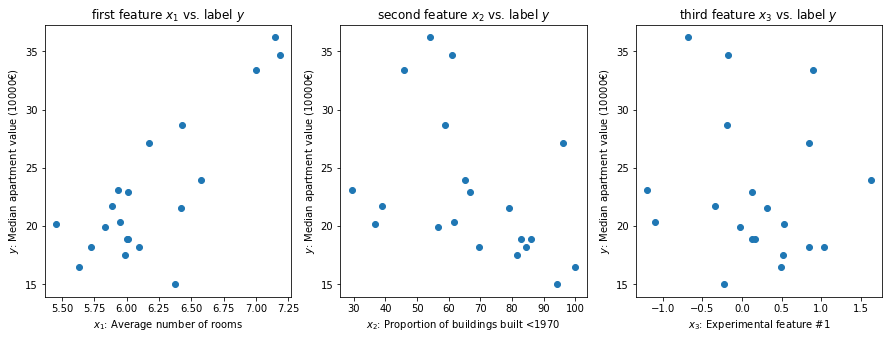

In [2]:
# Create a figure with 3 subplots in 1 row 
fig, ax = plt.subplots(1, 3, figsize=(15,5))

# Create first subplot 
ax[0].scatter(X[:,0], y)
ax[0].set_title('first feature $x_{1}$ vs. label $y$')
ax[0].set_xlabel('$x_{1}$: Average number of rooms')
ax[0].set_ylabel('$y$: Median apartment value (10000€)')

# Create second subplot 
ax[1].scatter(X[:,1], y)
ax[1].set_xlabel('$x_{2}$: Proportion of buildings built <1970')
ax[1].set_title('second feature $x_{2}$ vs. label $y$')
ax[1].set_ylabel('$y$: Median apartment value (10000€)')

# Create second subplot 
ax[2].scatter(X[:,2], y)
ax[2].set_xlabel('$x_{3}$: Experimental feature #1')
ax[2].set_title('third feature $x_{3}$ vs. label $y$')
ax[2].set_ylabel('$y$: Median apartment value (10000€)')

# Display the figure containing two subplots 
plt.show()

By looking at the scatterplots above, we can see that the median apartment value seems to be related to at least some of the features. As one would expect, the average number of rooms seems to be positively correlated with the median value. In contrast, the first experimental feature $x_3$ does not seem very informative. We can only hope that the research team has done a better job with the rest of the experimental features.

## Linear Regression 

As discussed during Round 1, given limited computational resources, ML methods cannot search for the best predictor function $h(\mathbf{x})$ over the entire space of all possible functions that map the feature vector $\mathbf{x}$ to a predicted label $\hat{y}$. This set of functions is simply too large. 

Every practical ML method uses a small subset of candidate predictor functions. This subset of candidate predictor functions is referred to as the **hypothesis space** or **model** underlying the ML method. Chapter 3 of [mlbook.cs.aalto.fi](mlbook.cs.aalto.fi) details how some of the most widely-used ML methods are obtained for specific choices for the hypothesis space. 

One of the most important example of a hypothesis space is the space of linear functions, 
\begin{equation*}
h^{(w_{0},\mathbf{w})}(\mathbf{x}) = w_0 + \mathbf{w}^{T} \mathbf{x} = w_0 + \sum_{i=1}^n w_i x_i. 
\tag{Eq1}
\end{equation*}
These linear functions are parametrized by the weight vector $\mathbf{w}=\big(w_1, w_2, \ldots, w_n \big)^T$ and the intercept term $w_0$. Each linear function ${\rm (Eq1)}$ is fully determined by the values of the weights and intercept. 

The linear function ${\rm (Eq1)}$ adds to the intercept term a weighted sum of the features $x_1, x_2, \ldots, x_n$ using the weights $w_1, w_2, \ldots, w_n$. Using linear predictor functions can be expected to work well if the features $\mathbf{x}$ of a data point are (at least approximatley) linearly related to the label $y$. 

Now that we have defined the form of the functions in the hypothesis space, we want to fit the model by finding the predictor function that results in the best predictions on the training data. 

### Training a (linear) regression model by minimizing the average loss

A loss function $\mathcal{L}(\hat{y}, y)$ quantifies the quality of a single prediction $\hat{y}=h(\mathbf{x})$ by comparing it to the true label $y$ of a data point. The basic idea is that good predictions will only incur a small loss, whereas bad predictions will incur a large loss. 

Given a set of labelled data and a loss function, we can evaluate the fit of a predictor function on the dataset $\mathcal{D}$ by computing the **average loss**, 

\begin{equation}
\label{eq:emprisk} \tag{Eq2}
    \mathcal{E} \big(h(\mathbf{x})|\mathcal{D} \big) = (1/m) \sum_{i=1}^m \mathcal{L}(\hat{y}^{(i)}, {y}^{(i)}).
\end{equation}

A popular choice for the loss function in regression problems is the **squared error loss**

\begin{equation}
    \mathcal{L}(\hat{y}, y) = (y - \hat{y})^2.
\end{equation}

Inserting the squared error loss into \eqref{eq:emprisk} results in the **mean squared error** (MSE)

\begin{equation}
    \mathcal{E}\big(h(\mathbf{x})|\mathcal{D}\big) = \frac{1}{m} \sum_{i=1}^m ({y}^{(i)} - \hat{y}^{(i)})^2 = \frac{1}{m} \sum_{i=1}^m ({y}^{(i)} - h(\mathbf{x}^{(i)}))^2 = \frac{1}{m} \sum_{i=1}^m ({y}^{(i)} - w_0 - \mathbf{w}^T\mathbf{x}^{(i)})^2.
\end{equation}

It seems quite natural to learn a predictor function $h \in \mathcal{H}$ for a function that minimizes the average loss over the training set, 

\begin{equation}
\hat{h} = \mbox{argmin}_{h\in \mathcal{H}}  \mathcal{E} \big(h(\mathbf{x})|\mathcal{D} \big). 
\end{equation}

For linear predictor maps $h^{(\mathbf{w})}$, which are parametrized by the weight vector $\mathbf{w}$, the optimal weight vector is obtained as 
\begin{equation}
\hat{w}_{0},\hat{\mathbf{w}} = \mbox{argmin}_{w_{0},\mathbf{w}}  \frac{1}{m} \sum_{i=1}^m ({y}^{(i)} - w_0 - \mathbf{w}^T\mathbf{x}^{(i)})^2.
 \tag{Eq3}
\end{equation}

In [3]:
from sklearn.linear_model import LinearRegression
from IPython.display import display, Math

# Load housing data with two features
X, y = load_housing_data(n=2)

# Create the linear regression object
reg = LinearRegression(fit_intercept=True) 

# Fit the linear regression model  
reg.fit(X, y)

# Get the optimal weight vector w of the fitted model 
w_opt = reg.coef_

# Reshape the numpy array to have dimension (n,1) 
w_opt = w_opt.reshape(-1,1)

# Print the optimal weight vector 
display(Math(r'$\mathbf{w}_{\rm opt} ='))
print(w_opt)

<IPython.core.display.Math object>

[[ 9.97587284]
 [-0.10507286]]


### The Training Error

The optimization problem ${\rm (Eq3)}$ is known as empirical risk minimization (ERM). Solving the ERM problem for linear regression provides two things. The solution itself are the optimum weights $\hat{\mathbf{w}}$ and optimal intercept $\hat{w}_{0}$. The average loss incurred by these optimum weights is often referred to as the **training error** of linear regression. 

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
# Create a linear regression model
reg = LinearRegression(fit_intercept=True) 

# Train the model on the features X and label y
reg = reg.fit(X, y)

# Calculate the predicted labels of the data points in the training set
y_pred = reg.predict(X)

# Calculate the MSE of the true and predicted labels of the training set
training_error = mean_squared_error(y, y_pred)

# Print training error 
print("\nThe resulting mean squared error (training error) is ", training_error)


The resulting mean squared error (training error) is  7.693037221421179


We have now trained our first model on the dataset and obtained a value for the training error. Next, we might want to try out some other models on the dataset. By comparing the training errors of the optimal predictor of different models, we can find the model that fits the training data the best.

Your task below is to try out a set of models for median apartment value prediction that utilize a different number of features in the original dataset. In the context of this problem, it is of particular interest to examine if the inclusion of the experimental features developed by the research team results in better predictions on the training data.

In [5]:
max_r = 10

# Load the dataset using 10 features 
X, y = load_housing_data(n=10)
  
# Vector for storing the training error of for each r
linreg_error = np.zeros(max_r)    

### STUDENT TASK ###
 
for i in range(max_r):
    x_2, y_2 = X[:,:i+1], y
    reg = LinearRegression(fit_intercept=False)
    reg.fit(x_2, y_2)
    y_2_pred = reg.predict(x_2)
    training_error = mean_squared_error(y_2, y_2_pred)
    linreg_error[i] = training_error
    


Next, we print and plot the training errors in order to assess how well the different models fit the data:

Training errors (rounded to 2 decimals): 
 [21.77 12.88 12.75 12.49 11.41 11.14 10.04  9.89  9.77  9.76]


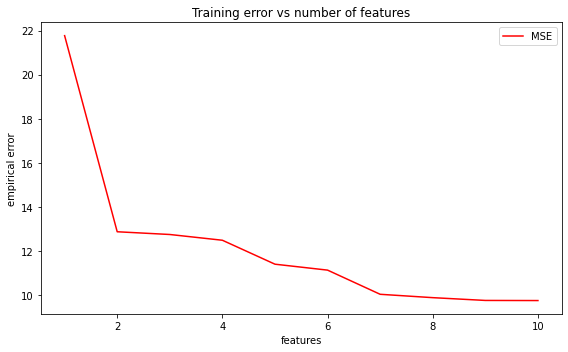

In [6]:
# Print the training errors
print(f"Training errors (rounded to 2 decimals): \n {np.round(linreg_error, 2)}")

# create a numpy array "r_values" containing the values 1,2...,max_r 
r_values = np.linspace(1, max_r, max_r, endpoint=True)
# create a plot object which can be accessed using variables "fig" and "axes"
fig, axes = plt.subplots(1,1, figsize=(8, 5))
# add a curve representing the average squared error for each choice of r 
axes.plot(r_values, linreg_error, label='MSE', color='red')
# add captions for the horizontal and vertical axes 
axes.set_xlabel('features')
axes.set_ylabel('empirical error')
# add a title to the plot 
axes.set_title('Training error vs number of features')
axes.legend()
plt.tight_layout()
plt.show()

As you can see, the training error is decreasing with respect to the number of features in the linear regression model. Based on this, it would seem that including more experimental features results in learning better predictor functions. In particular, using all 10 features of data points results in the smallest training error. 

It is tempting to conclude that we should use all available features of neighborhoods to predict their median apartment price. However, keep in mind that the actual purpose of the model is to predict the median apartment value of neighborhoods that are **not** in the training set $\mathcal{D}$. As such, a low error on the training set is not necessarily a reliable indicator for a good performance on datapoints (neighborhoods) outside the training set $\mathcal{D}$. We will see in Round 3 of our course that if a predictor function incurs a small (even close to zero) error on a training set, does not necessarily imply accurate predictions on data points outside the training set. 

Your next task is to explore the effect of using a different number of data points for training the model.

In [9]:
# maximum number of data points
max_m = 10     

# Load the dataset using n=2 features 
X, y = load_housing_data(n=2)   

# Array in which to store the training errors of the different number of data points
train_error = np.zeros(max_m)         

for i in range(max_m):
    x_2, y_2 = X[:i+1, :], y[:i+1]
    reg = LinearRegression(fit_intercept=False)
    reg.fit(x_2, y_2)
    y_2_pred = reg.predict(x_2)
    training_error = mean_squared_error(y_2, y_2_pred)
    train_error[i] = training_error 

In [10]:
# Perform sanity checks on the results
assert train_error.shape == (10,), "'train_error' has wrong dimensions."
assert train_error[0] < 100 * train_error[3], "training errors not correct"
assert train_error[2] > train_error[1], "training errors not correct"

print('Sanity checks passed!')


Sanity checks passed!


Next, we print and plot the training errors in order to assess how well the different models fit the data:

Training Errors (Rounded to 2 decimals): 
 [ 0.    0.    3.91  4.12  4.49  3.9   3.37 10.19  9.4   9.25]


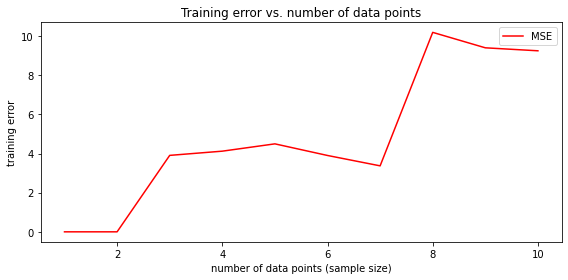

In [11]:
# Print training errors
print(f"Training Errors (Rounded to 2 decimals): \n {np.round(train_error, 2)}")

# create a numpy array "m_values" containing the values 1,2...,max_m
m_values = np.arange(1, max_m + 1)
# create a plot object which can be accessed using variables "fig" and "axes"
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
# add a curve representing the average squared error for each choice of m
axes.plot(m_values, train_error, label='MSE', color='red')
# add captions for axes of the plot 
axes.set_xlabel('number of data points (sample size)')
axes.set_ylabel('training error')
# add title for the plot 
axes.set_title('Training error vs. number of data points')
axes.legend()
plt.tight_layout()
# display the plot 
plt.show()

## (Non-) Robustness Against Outliers

Suppose that the domain experts at the fund work very long hours, and are often tired when entering apartment valuation data into the database. Sometimes the tiredness causes careless mistakes that result in abnormally high or low values for the median apartment value of some neighborhood. The resulting data points differ significantly from the intact data points and are called **outliers**.

In general we would like to have ML methods that are robust against outliers. Having some datapoints in the training set that are corrupted should not significantly affect the learnt predictor function (see ${\rm (Eq3)}$). It turns out that using the squared error loss to learn a linear predictor yiels a ML method that is quite sensitive to outliers. Intuitively, having an outlier must result in a significantly different predictor function since otherwise the loss for the outlier would be too large. This is due to using the square $(y-\hat{y})$ of the prediction error $(y-\hat{y})$ which "amplifies" the effect of an outlier in the training data. We will see below that replacing the squared error loss with another loss function to learn a linear predictor provides more robustness against outliers. 

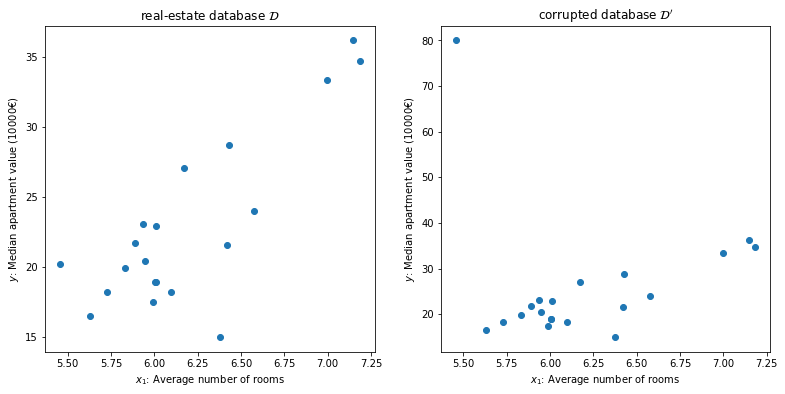

In [12]:
def load_corrupted_data():
    X, y = load_housing_data(n=1)
    
    # perturb the label of the data point with lowest x_1
    y[np.argmin(X)] = 80
    
    return X, y

X, y = load_housing_data(n=1)
X_cor, y_cor = load_corrupted_data()

# Plot the real and the corrupted datasets for comparison

fig, ax = plt.subplots(1, 2,  figsize=(13,6))   # create a figure with two horizontal subplots
ax[0].scatter(X, y)
ax[0].set_xlabel('$x_1$: Average number of rooms')
ax[0].set_ylabel("$y$: Median apartment value (10000€)")
ax[0].set_title("real-estate database $\mathcal{D}$")
ax[1].scatter(X_cor, y_cor)
ax[1].set_xlabel('$x_1$: Average number of rooms')
ax[1].set_ylabel("$y$: Median apartment value (10000€)")
ax[1].set_title("corrupted database $\mathcal{D}'$")
plt.show()

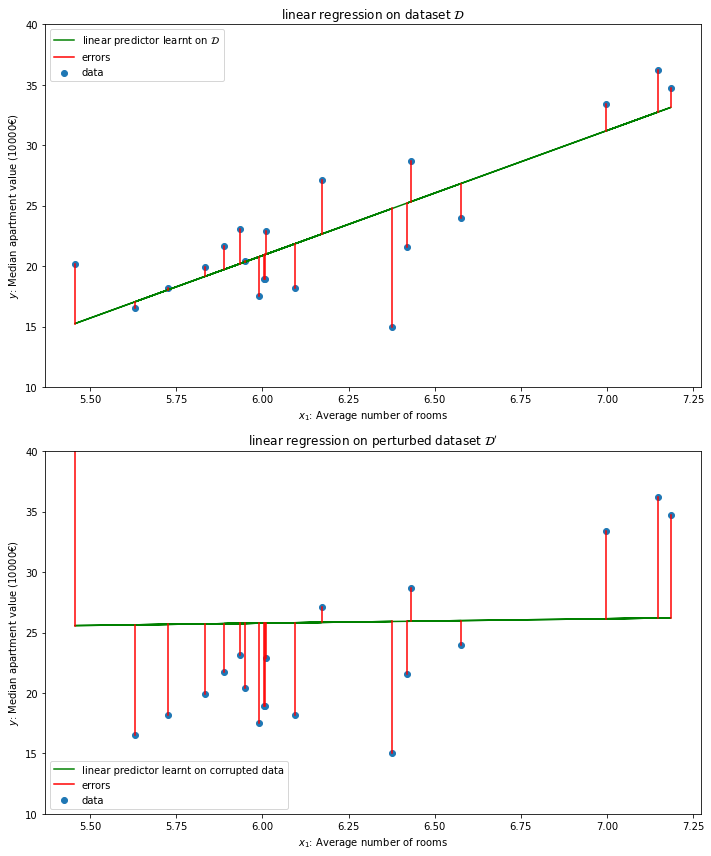

optimal weight w_opt by fitting to (training on) clean training data :  10.352233546854798
optimal weight w_opt by fitting to (training on) corrupted training data :  0.3674172019622477


In [13]:
# A linear predictor map by minimizing MSE incurred on the dataset D

reg = LinearRegression(fit_intercept=True) # the object 'reg' represents linear maps with intercept
reg = reg.fit(X, y)                        # .fit(X,y) determines optimal weights for linear map to minimize MSE
y_pred = reg.predict(X)                    # use optimal weights to predict the label values for datapints with features in X

# learn a linear predictor map by minimizing MSE incurred on corrupdated dataset D'

reg_cor = LinearRegression(fit_intercept=True) # the object 'reg_cor' represents linear maps with intercept
reg_cor = reg_cor.fit(X_cor, y_cor)   #.fit(X_cor,y_cor) determines weights by minimizing the MSE on corrupted dataset D'
y_pred_cor = reg_cor.predict(X_cor)   # use learnt weights to predict the label values for datapoints in D'

# Create a plot object which can be accessed using variables "fig" and "axes"

fig, axes = plt.subplots(2, 1, figsize=(10, 12))   # create a figure with two vertical subplots 
axes[0].scatter(X, y, label='data')  # Plot data points
axes[0].plot(X, y_pred, color='green', label='linear predictor learnt on $\mathcal{D}$')  # Plot linear predictor

# For each data point, add line indicating error
axes[0].plot((X[0], X[0]), (y[0], y_pred[0]), color='red', label='errors')  # Add label to legend
for i in range(len(X)-1):
    lineXdata = (X[i+1], X[i+1])  # Same X
    lineYdata = (y[i+1], y_pred[i+1])  # Different Y
    axes[0].plot(lineXdata, lineYdata, color='red')

# Set axes title, labels and legend
axes[0].set_title('linear regression on dataset $\mathcal{D}$')
axes[0].set_xlabel('$x_1$: Average number of rooms')
axes[0].set_ylabel("$y$: Median apartment value (10000€)")
axes[0].set_ylim(10,40)  # set y-axis range to 0 till 100
axes[0].legend()

axes[1].scatter(X_cor, y_cor, label='data')  # Plot data points 
axes[1].set_ylim(10,40)  # set y-axis range to 0 till 100
axes[1].plot(X, y_pred_cor, color='green', label='linear predictor learnt on corrupted data')  # Plot linear predictor

# now add individual line for each error point
axes[1].plot((X[0], X[0]), (y_cor[0], y_pred_cor[0]), color='red', label='errors')  # Add label to legend
for i in range(len(X)-1):
    lineXdata = (X[i+1], X[i+1])  # Same X
    lineYdata = (y_cor[i+1], y_pred_cor[i+1])  # Different Y
    axes[1].plot(lineXdata, lineYdata, color='red')

# set axes title, labels and legend
axes[1].set_title('linear regression on perturbed dataset $\mathcal{D}{\'}$')
axes[1].set_xlabel('$x_1$: Average number of rooms')
axes[1].set_ylabel("$y$: Median apartment value (10000€)")
axes[1].legend()

fig.tight_layout()
plt.show()

print("optimal weight w_opt by fitting to (training on) clean training data : ", reg.coef_[0])
print("optimal weight w_opt by fitting to (training on) corrupted training data : ", reg_cor.coef_[0])

The figure above shows that the erroneous data point significantly affects the optimal predictor function obtained by minimizing the MSE on $\mathcal{D}'$. The linear predictor learnt by minimizing the MSE on the dataset $\mathcal{D}'$ depends heavily on a single outlier. We can therefore expect this predictor function to incur a large prediction error for datapoints outside $\mathcal{D}'$. A simple yet powerful approach to obtain more robustness against outliers is to replace the squared error loss with a different loss function which we will introduce next. 

## The Huber Loss

Learning a linear predictor function by minimizing the squared error loss $(h(\mathbf{x}) - y)^{2}$ forces learnt predictor $h(\mathbf{x})$ to not be too far away from any data point in the training set including the outlier. This, in turn, means that if we replace a single data point by an outlier far away, then also the predictor function must change substantially to keep the squared error small. 
 
It turns out that using a different loss function to learn a linear predictor can make the learning robust against few outliers. One such loss function is known as the ["Huber loss"](https://en.wikipedia.org/wiki/Huber_loss) $\mathcal{L}(\hat{y},y)$, and is defined as 

\begin{equation}
\mathcal{L}(y,\hat{y}) = \begin{cases} (1/2) (y-\hat{y})^{2} & \mbox{ for } |y-\hat{y}| \leq   \varepsilon \\ 
\varepsilon(|y-\hat{y}| - \varepsilon/2) & \mbox{ else. }\end{cases} 
\tag{Eq4}
\end{equation}

**The Huber loss is robust to outliers since the errors for which $|y - \hat{y}| > \varepsilon$ are not squared**. Thus, these data points have a smaller effect on the total loss over the dataset and hence the resulting fit. Note that the Huber loss contains a parameter $\varepsilon$, which has to be adapted to the application at hand. A principle approach to choose the value of $\varepsilon$ is to try out several candidate values and then pick the one resulting in the best overall performance. This overall performance of a ML method can be measured by one of the validation techniques discussed in Round 3 of this course. 

The Huber loss ${\rm (Eq4)}$ includes two important special cases. The first special case is when $\varepsilon$ is chosen very large (the precise value depending on the value range of the features and labels), such that the condition $|y-\hat{y}| \leq \varepsilon$ is always satisfied. In this case, the Huber loss is equivalent to the squared error loss $(y-\hat{y})^{2}$ (with an additional factor 1/2). 

Another special case of the Huber loss ${\rm (Eq4)}$ is obtained when $\varepsilon$ is very small (close to $0$) such that the condition $|y-\hat{y}| \leq \varepsilon$ is never satisfied. In this case, the Huber loss reduces to the absolute loss $|y - \hat{y}|$ (scaled by a factor $\varepsilon$).

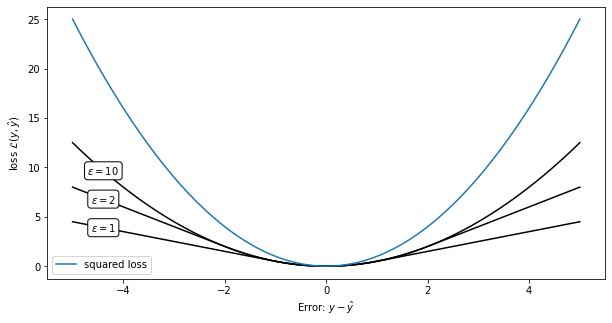

In [14]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
import matplotlib.pyplot as plt


#------------------------------------------------------------
# Define the Huber loss
def HuberLoss(pred_error, epsilon):
    # pred_error - prediction error y-y_pred
    # epsilon - parameter epsilon 𝜀 
    pred_error = abs(pred_error)
    flag = (pred_error > epsilon)
    return (~flag) * (0.5 * pred_error ** 2) - (flag) * epsilon * (0.5 * epsilon - pred_error)

#------------------------------------------------------------
# Plot for several values of epsilon
fig = plt.figure(figsize=(10, 5)) # set figure size
ax = fig.add_subplot(111) # add 1 subplot

pred_error = np.linspace(-5, 5, 100) # create linear space from -5 to 5 with 100 steps

for epsilon in (1, 2, 10): # loop through values 1, 2, 10
    loss = HuberLoss(pred_error, epsilon)
    ax.plot(pred_error, loss, '-k') # plot x and y

    if epsilon > 10:
        s = r'\infty' # set s to infinity sign (string format)
    else:
        s = str(epsilon) # set s to string of number epsilon

    ax.text(pred_error[6], loss[6], '$\epsilon=%s$' % s,
            ha='center', va='center',
            bbox=dict(boxstyle='round', ec='k', fc='w')) # add test to each line

ax.plot(pred_error, np.square(pred_error),label="squared loss") # plot the sqared loss (blue line)

ax.set_xlabel(r'Error: $y - \hat{y}$') # set x labels
ax.set_ylabel(r'loss $\mathcal{L}(y,\hat{y})$') # set y label
ax.legend() # show legend in plot
plt.show() # show the plot

In [15]:
from sklearn import linear_model
from sklearn.linear_model import HuberRegressor

X, y = load_housing_data(n=1)
X_cor, y_cor = load_corrupted_data()   # read in 20 data points with single feature x_1 and label y 


reg = HuberRegressor()
reg.fit(X, y)
y_pred = reg.predict(X)

reg_cor = HuberRegressor()
reg_cor.fit(X_cor, y_cor)
y_pred_cor = reg_cor.predict(X_cor)

print("optimal weight w_opt by fitting on clean data : ", reg.coef_[0])
print("optimal weight w_opt by fitting on perturbed data : ", reg_cor.coef_[0])

optimal weight w_opt by fitting on clean data :  10.988807856692537
optimal weight w_opt by fitting on perturbed data :  10.988804256507414


In [16]:
# Perform some sanity checks on the output
assert y_pred.shape == (20,), "The shape of y_pred is wrong!"
assert y_pred_cor.shape == (20,), "The shape of y_pred_cor is wrong!"

print("Sanity checks passed!")

Sanity checks passed!


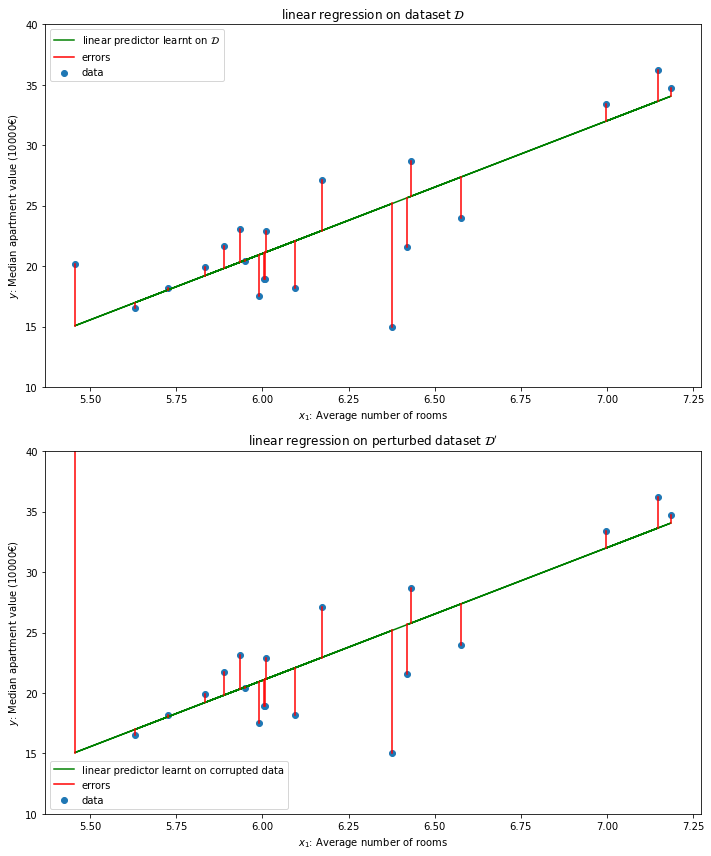

optimal weight w_opt by fitting to (training on) clean training data :  10.988807856692537
optimal weight w_opt by fitting to (training on) corrupted training data :  10.988804256507414


In [17]:
fig, axes = plt.subplots(2, 1, figsize=(10, 12))   # create a figure with two vertical subplots 
axes[0].scatter(X, y, label='data')  # Plot data points
axes[0].plot(X, y_pred, color='green', label='linear predictor learnt on $\mathcal{D}$')  # Plot linear predictor

# For each data point, add line indicating error
axes[0].plot((X[0], X[0]), (y[0], y_pred[0]), color='red', label='errors')  # Add label to legend
for i in range(len(X)-1):
    lineXdata = (X[i+1], X[i+1])  # Same X
    lineYdata = (y[i+1], y_pred[i+1])  # Different Y
    axes[0].plot(lineXdata, lineYdata, color='red')

# Set axes title, labels and legend
axes[0].set_title('linear regression on dataset $\mathcal{D}$')
axes[0].set_xlabel('$x_1$: Average number of rooms')
axes[0].set_ylabel("$y$: Median apartment value (10000€)")
axes[0].set_ylim(10,40)  # set y-axis range to 0 till 100
axes[0].legend()

axes[1].scatter(X_cor, y_cor, label='data')  # Plot data points 
axes[1].set_ylim(10,40)  # set y-axis range to 0 till 100
axes[1].plot(X, y_pred_cor, color='green', label='linear predictor learnt on corrupted data')  # Plot linear predictor

# now add individual line for each error point
axes[1].plot((X[0], X[0]), (y_cor[0], y_pred_cor[0]), color='red', label='errors')  # Add label to legend
for i in range(len(X)-1):
    lineXdata = (X[i+1], X[i+1])  # Same X
    lineYdata = (y_cor[i+1], y_pred_cor[i+1])  # Different Y
    axes[1].plot(lineXdata, lineYdata, color='red')

# set axes title, labels and legend
axes[1].set_title('linear regression on perturbed dataset $\mathcal{D}{\'}$')
axes[1].set_xlabel('$x_1$: Average number of rooms')
axes[1].set_ylabel("$y$: Median apartment value (10000€)")
axes[1].legend()

fig.tight_layout()
plt.show()

print("optimal weight w_opt by fitting to (training on) clean training data : ", reg.coef_[0])
print("optimal weight w_opt by fitting to (training on) corrupted training data : ", reg_cor.coef_[0])

We can see that the predictors trained on the original and perturbed data are very similar when using the Huber loss, in contrast to the large difference in the predictors that minimize the mean-squared error.

## Key takeaways

- **Regression problems** consist in predicting the numeric label $y$ of a data point based on its features $\mathbf{x}$. 



- A widely used hypothesis space for regression methods is the space of linear functions $\hat{y} = h(\mathbf{x}) = w_{0}+w_1x_1 + w_2x_2 + \ldots + w_nx_n$. 


- Regression methods using linear functions work well if there is an (approximately) linear relation between features and label of datapoints.

- A large class of regression methods uses the squared error loss $\mathcal{L}(y,\hat{y}) = (y-\hat{y})^{2}$. These methods learn a predictor function $h(\mathbf{x})$ by minimizing the average (mean) squared error (MSE)
\begin{equation}
   \frac{1}{m} \sum_{i=1}^m (y^{(i)} - \hat{y}^{(i)})^2 =  \frac{1}{m} \sum_{i=1}^m \big(y^{(i)} - h\big(\mathbf{x}^{(i)}\big)\big)^2, 
\end{equation}
on a labeled dataset. 

- The minimum MSE achieved by the optimal linear predictor is referred as the training error of a linear regression method. The training error depends on the number of features used to characterize datapoints as well as on the number of datapoints used for the training set. 

- Another popular choice for the loss function in regression problems is the Huber loss,
\begin{equation}
\mathcal{L}(y,\hat{y}) = \begin{cases} (1/2) (y-\hat{y})^{2} & \mbox{ for } |y-\hat{y}| \leq   \varepsilon \\ 
\varepsilon(|y-\hat{y}| - \varepsilon/2) & \mbox{ else. }\end{cases}
\end{equation}

- ML methods that use the Huber loss instead of the squared error loss tend to be more robust against the presence of few outliers in the training dataset.